The CIFAR-10 dataset that we are using is available directly through the keras module. Therefore, it is easy to download and preprocess. 

In [70]:
# Importing the dataset and other relevant modules
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

Below, we create our input (X) and output (Y) matrices for training our neural networks. The keras module already provides separate training and test datasets.

In [71]:
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

Now that we have our data, we need to preprocess it. Specifically, we need to convert the pixel values of the images to floats and then normalize the dataset by dividing by the highest pixel value (255).

In [72]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

Finally, we need to convert our output to categorical variables for us to classify. We do this through one-hot encoding. 

In [73]:
# one hot encode target values
trainY = np_utils.to_categorical(trainY)
testY = np_utils.to_categorical(testY)

We now define our model. 

In [74]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Compiling the model and defining the loss function and the optimizer

In [75]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

We can now take a look at the summary of our model. 

In [76]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

Finally, we fit the model and save its history to be able to plot it for evaluation.

In [77]:
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)

Evaluation of our model.

In [78]:
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 84.620


We can also plot the confusion matrix for our model. Looking at it, we see that the model often confuses animals for one another. Specifically, we see that there is overlap between the predictions for cats and dogs.

Test accuracy: 0.8462
Precision 0.8477666889139318
Recall 0.8462
F1 score 0.8448389331781321

Confusion matrix: 


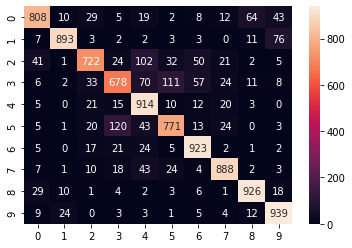

In [89]:
y_pred = model.predict(testX)
y_pred = np.argmax(y_pred,1)
y_true = np.argmax(testY,1)

print("Test accuracy: %g" %(accuracy_score(y_true, y_pred)))
print("Precision", precision_score(y_true, y_pred, average="macro"))
print("Recall", recall_score(y_true, y_pred, average="macro"))
print("F1 score", f1_score(y_true, y_pred, average="macro"))
print("\nConfusion matrix: ")

sns.heatmap(conf, annot=True, fmt='d')

Now we can plot our loss and accuracy to see how well our model was trained.

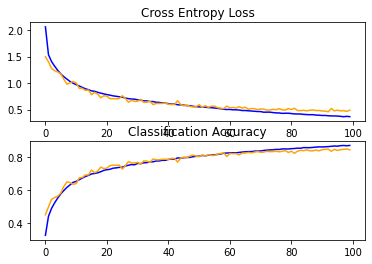

In [81]:
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.show()

In [82]:
# Function to load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

Here, we can start making predictions about new images that we have not seen before. 

In [84]:
results = {
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

im=load_image("plane.jpg")

pred=np.argmax(model.predict([im])[0], axis=-1)
print(pred, results[pred])

0 aeroplane
